# Analysis of the Weighted Ingredient Graph

In this notebook we do a basic analysis of the weighted ingredient graph we created for our project. 

- Nodes: Each node represents an ingredient. Each node also contains metadata
about the average rating of recipes that include the ingredient.
- Edges: An edge connects two ingredients if they co-occur in at least one recipe.
- Weights: Edge weights represent the frequency of co-occurrence of the connected
ingredients across all recipes.

In [105]:
import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt
from collections import defaultdict
import numpy as np


In [106]:
ingredient_graph = nx.read_gml(r"graphs/ingredients_weighted_graph.gml")

In [107]:
for node in ingredient_graph.nodes(data=True):
    print(node)


('meatloaf', {})
('bacon', {})
('cheese', {})
('butter', {})
('eggs', {})
('spinach', {})
('onion', {})
('pepper', {})
('potatoes', {})
('garlic', {})
('salt', {})
('olive oil', {})
('beef', {})
('taco', {})
('shell', {})
('lettuce', {})
('tomatoes', {})
('salsa', {})
('cheddar', {})
('corn', {})
('pork', {})
('bean', {})
('tomato', {})
('beef broth', {})
('chip', {})
('bouillon', {})
('sazón', {})
('cinnamon', {})
('chili', {})
('cumin', {})
('coriander', {})
('sugar', {})
('chocolate', {})
('milk', {})
('flour', {})
('cream', {})
('apple', {})
('lemon', {})
('macaroni', {})
('water', {})
('cornstarch', {})
('paprika', {})
('vinegar', {})
('ketchup', {})
('applesauce', {})
('ponzu', {})
('syrup', {})
('smoke', {})
('cider', {})
('oregano', {})
('cayenne', {})
('egg', {})
('olive', {})
('pepperoni', {})
('mushroom', {})
('mozzarella', {})
('pizza', {})
('celery', {})
('molasses', {})
('worcestershire', {})
('buns', {})
('seltzer', {})
('panko', {})
('oil', {})
('yeast', {})
('basil', {

In [108]:
def visualize_ingredient_graph(G, top_n=20):
    top_ingredients = sorted(G.degree, key=lambda x: x[1], reverse=True)[:top_n]
    top_graph = G.subgraph([ing for ing, _ in top_ingredients])

    plt.figure(figsize=(10, 10))
    pos = nx.spring_layout(top_graph, k=0.5, iterations=50)

    nx.draw(
        top_graph,
        pos,
        with_labels=True,
        node_color='lightblue',
        node_size=[top_graph.degree(node) * 20 for node in top_graph.nodes()],
        font_size=8,
        edge_color='gray',
        alpha=0.7
    )

    edge_labels = nx.get_edge_attributes(top_graph, 'weight')
    nx.draw_networkx_edge_labels(top_graph, pos, edge_labels=edge_labels, font_size=7)

    plt.title("Top Ingredient Connections")
    plt.tight_layout()
    plt.show()


## Answering questions proposed for the research

In this part of the notebook we are focusing on the two research questions we proposed regarding the ingredients graph.

In [109]:
def analyze_ingredient_popularity(df):
    ingredient_popularity = defaultdict(list)
    
    for _, row in df.iterrows():
        ingredients = row['clean_ingredients']
        rating = row['average_rating']
        
        for ing in ingredients:
            ingredient_popularity[ing].append(rating)
    
    ingredient_impact = {}
    for ing, ratings in ingredient_popularity.items():
        ingredient_impact[ing] = {
            'avg_rating': sum(ratings) / len(ratings),
            'frequency': len(ratings),
            'total_rating_impact': sum(ratings)
        }
    
    sorted_ingredients = sorted(
        ingredient_impact.items(), 
        key=lambda x: x[1]['total_rating_impact'], 
        reverse=True
    )
    
    print("\nTop Ingredients by Popularity Impact:")
    for ing, data in sorted_ingredients[:10]:
        print(f"Ingredient: {ing}")
        print(f"  Average Rating: {data['avg_rating']:.2f}")
        print(f"  Frequency in Recipes: {data['frequency']}")
        print(f"  Total Rating Impact: {data['total_rating_impact']:.2f}")
        print()


C:\Users\vassa\AppData\Local\Temp\ipykernel_24368\1263557226.py:23: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


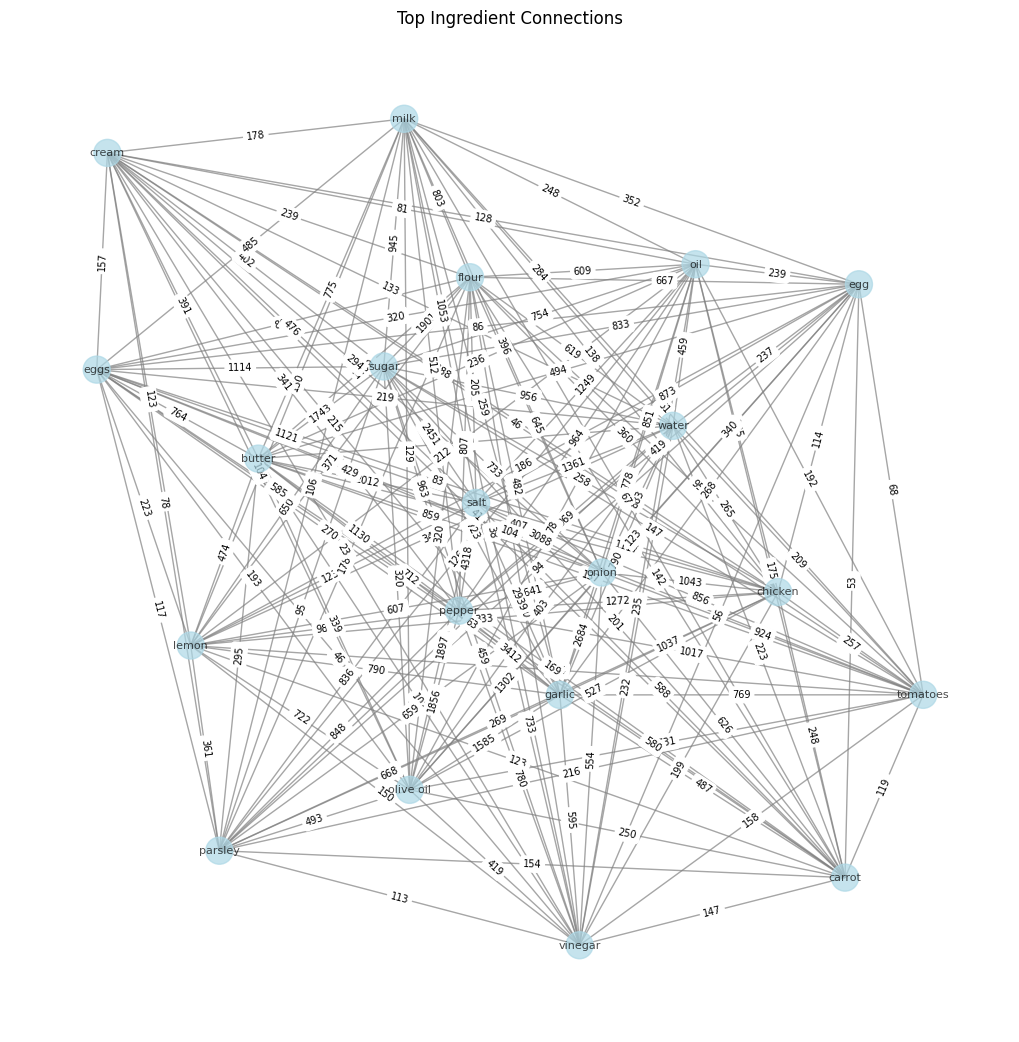

In [110]:
visualize_ingredient_graph(ingredient_graph)

Answering Specific Questions
1. Which ingredient combinations are most frequently used together, and how do they influence recipe popularity?
After loading the graph and co-occurrence data:

Use get_top_ingredient_combinations to find the most frequent ingredient pairs.
Look at the avg_rating and avg_raters in the output to analyze their influence on popularity.


2. Which ingredient has the most influence on recipe popularity?
Use analyze_ingredient_popularity to calculate the total rating impact (total_rating_impact) and sort the ingredients.

In [111]:
def get_top_ingredient_combinations_from_graph(G, top_n=10):
    top_edges = sorted(G.edges(data=True), key=lambda x: x[2]['weight'], reverse=True)[:top_n]
    
    print("Top Ingredient Combinations by Co-occurrence:")
    for u, v, data in top_edges:
        print(f"Ingredients: ({u}, {v})")
        print(f"  Co-occurrence Count (Weight): {data['weight']}")


In [112]:
get_top_ingredient_combinations_from_graph(ingredient_graph, top_n=30)

Top Ingredient Combinations by Co-occurrence:
Ingredients: (pepper, salt)
  Co-occurrence Count (Weight): 4318
Ingredients: (onion, pepper)
  Co-occurrence Count (Weight): 3641
Ingredients: (pepper, garlic)
  Co-occurrence Count (Weight): 3412
Ingredients: (onion, salt)
  Co-occurrence Count (Weight): 3088
Ingredients: (garlic, salt)
  Co-occurrence Count (Weight): 2939
Ingredients: (onion, garlic)
  Co-occurrence Count (Weight): 2684
Ingredients: (salt, sugar)
  Co-occurrence Count (Weight): 2451
Ingredients: (salt, flour)
  Co-occurrence Count (Weight): 2059
Ingredients: (butter, salt)
  Co-occurrence Count (Weight): 2012
Ingredients: (sugar, flour)
  Co-occurrence Count (Weight): 1901
Ingredients: (salt, olive oil)
  Co-occurrence Count (Weight): 1897
Ingredients: (pepper, olive oil)
  Co-occurrence Count (Weight): 1856
Ingredients: (butter, sugar)
  Co-occurrence Count (Weight): 1743
Ingredients: (garlic, olive oil)
  Co-occurrence Count (Weight): 1585
Ingredients: (butter, flour)


In [113]:
def get_top_ingredient_combinations_by_popularity(G, top_n=10, min_raters=0):
    filtered_edges = [
        (u, v, data) 
        for u, v, data in G.edges(data=True)
        if data.get('total_raters', 0) >= min_raters
    ]
    
    top_edges = sorted(
        filtered_edges,
        key=lambda x: x[2].get('avg_rating', 0),
        reverse=True
    )[:top_n]
    
    print(f"\nTop {top_n} Ingredient Combinations (minimum {min_raters} raters):")
    print("-" * 50)
    
    results = []
    for u, v, data in top_edges:
        avg_rating = data.get('avg_rating', None)
        total_raters = data.get('total_raters', None)
        
        if isinstance(avg_rating, (int, float)) and isinstance(total_raters, (int, float)):
            results.append((u, v, avg_rating, total_raters))
            print(f"\nIngredients: {u} + {v}")
            print(f"  Average Recipe Rating: {avg_rating:.2f}")
            print(f"  Total Number of Raters: {int(total_raters)}")
    
    return results

def analyze_ingredient_combinations(G, top_ns=[5, 10], min_raters_list=[0, 5, 10]):
    print("Ingredient Combination Analysis")
    print("=" * 50)
    
    for min_raters in min_raters_list:
        for top_n in top_ns:
            combinations = get_top_ingredient_combinations_by_popularity(
                G, 
                top_n=top_n, 
                min_raters=min_raters
            )
            print("\n")

In [142]:
analyze_ingredient_combinations(ingredient_graph, top_ns=[10], min_raters_list=[10,50,100,500])

Ingredient Combination Analysis

Top 10 Ingredient Combinations (minimum 10 raters):
--------------------------------------------------

Ingredients: cheese + strawberry
  Average Recipe Rating: 5.00
  Total Number of Raters: 10

Ingredients: butter + cashew
  Average Recipe Rating: 5.00
  Total Number of Raters: 11

Ingredients: butter + haricot
  Average Recipe Rating: 5.00
  Total Number of Raters: 10

Ingredients: spinach + peas
  Average Recipe Rating: 5.00
  Total Number of Raters: 23

Ingredients: onion + catfish
  Average Recipe Rating: 5.00
  Total Number of Raters: 10

Ingredients: onion + pork ribs
  Average Recipe Rating: 5.00
  Total Number of Raters: 14

Ingredients: onion + pickles
  Average Recipe Rating: 5.00
  Total Number of Raters: 12

Ingredients: pepper + salad dressing
  Average Recipe Rating: 5.00
  Total Number of Raters: 14

Ingredients: pepper + haricot
  Average Recipe Rating: 5.00
  Total Number of Raters: 11

Ingredients: garlic + salami
  Average Recipe R

In [115]:
def get_most_influential_ingredients(G, top_n=10):
    weighted_degree_centrality = nx.degree_centrality(G)
    
    top_nodes = sorted(weighted_degree_centrality.items(), key=lambda x: x[1], reverse=True)[:top_n]
    
    print("Most Influential Ingredients by Weighted Degree Centrality:")
    for node, centrality in top_nodes:
        print(f"Ingredient: {node}")
        print(f"  Centrality Score: {centrality:.4f}")

In [116]:
get_most_influential_ingredients(ingredient_graph, top_n=30)

Most Influential Ingredients by Weighted Degree Centrality:
Ingredient: salt
  Centrality Score: 0.8553
Ingredient: onion
  Centrality Score: 0.7372
Ingredient: pepper
  Centrality Score: 0.7335
Ingredient: garlic
  Centrality Score: 0.7033
Ingredient: sugar
  Centrality Score: 0.6914
Ingredient: butter
  Centrality Score: 0.6584
Ingredient: water
  Centrality Score: 0.6456
Ingredient: olive oil
  Centrality Score: 0.6099
Ingredient: flour
  Centrality Score: 0.6053
Ingredient: oil
  Centrality Score: 0.5971
Ingredient: lemon
  Centrality Score: 0.5659
Ingredient: eggs
  Centrality Score: 0.5311
Ingredient: milk
  Centrality Score: 0.5247
Ingredient: egg
  Centrality Score: 0.5101
Ingredient: chicken
  Centrality Score: 0.5055
Ingredient: tomatoes
  Centrality Score: 0.5000
Ingredient: vinegar
  Centrality Score: 0.4936
Ingredient: parsley
  Centrality Score: 0.4707
Ingredient: carrot
  Centrality Score: 0.4634
Ingredient: cream
  Centrality Score: 0.4606
Ingredient: cinnamon
  Central

# Basic analysis of the graph

In this section we are conducting basic analysis of the graph to understand the structure and the underlying patterns of the network.

### Centralities

In [117]:
def compute_centralities(G):
    strength = dict(G.degree(weight='weight'))
    max_strength = max(strength.values())
    strength_centrality = {node: val/max_strength for node, val in strength.items()}
    
    betweenness_centrality = nx.betweenness_centrality(G, weight='weight')
    
    weighted_closeness = nx.closeness_centrality(
        G, 
        distance='weight',
        wf_improved=True 
    )
    
    try:
        eigenvector_centrality = nx.eigenvector_centrality(
            G, 
            weight='weight',
            max_iter=1000,
            tol=1e-6
        )
    except nx.PowerIterationFailedConvergence:
        print("Warning: Eigenvector centrality failed to converge")
        eigenvector_centrality = {}
    
    return {
        'strength': strength_centrality,
        'betweenness': betweenness_centrality,
        'closeness': weighted_closeness,
        'eigenvector': eigenvector_centrality
    }


def get_top_ingredients(graph, centralities, centrality_type='strength', top_n=10):
    if centrality_type not in centralities:
        raise ValueError("Invalid centrality type. Choose from ['strength', 'betweenness', 'closeness', 'eigenvector']")
    
    sorted_centralities = sorted(centralities[centrality_type].items(), key=lambda x: x[1], reverse=True)
    sorted_centralities = [(node, centrality) for node, centrality in sorted_centralities]
    
    return sorted_centralities[:top_n]



from collections import Counter

def get_top_ingredients_by_frequency(graph, centralities, top_n=5):
    all_top_ingredients = []
    
    for centrality_type in ['strength', 'betweenness', 'closeness', 'eigenvector']:
        top_ingredients = get_top_ingredients(graph, centralities, centrality_type=centrality_type, top_n=top_n)
        all_top_ingredients.extend([ingredient[0] for ingredient in top_ingredients]) 
    
    ingredient_counts = Counter(all_top_ingredients)
    
    top_ingredients_by_frequency = ingredient_counts.most_common(top_n)
    
    return top_ingredients_by_frequency


In [118]:
def centralities_info(graph, graph_name):
    
    centralities = compute_centralities(graph)
    print(f"Centralities for {graph_name}: {centralities}")

    top_ingredients_by_frequency = get_top_ingredients_by_frequency(graph, centralities, top_n=10)
    print(f"Top Ingredients by Frequency across Centralities in {graph_name}:")
    for ingredient, count in top_ingredients_by_frequency:
        print(f"{ingredient}: {count} times")
    

In [119]:
centralities_info(ingredient_graph, "Ingredient network")

Centralities for Ingredient network: {'strength': {'meatloaf': 0.0005752607596469716, 'bacon': 0.08727311261486292, 'cheese': 0.13009976232647563, 'butter': 0.401214102971676, 'eggs': 0.23128510226016924, 'spinach': 0.06009961094206519, 'onion': 0.7158514616164827, 'pepper': 0.8754106302133007, 'potatoes': 0.02143603251737136, 'garlic': 0.6712384758617558, 'salt': 1.0, 'olive oil': 0.38216994413915256, 'beef': 0.0965227000923445, 'taco': 0.015138441043341357, 'shell': 0.0024070121258912757, 'lettuce': 0.038436501809043705, 'tomatoes': 0.20668513556473955, 'salsa': 0.02007357282347064, 'cheddar': 0.07947681547754212, 'corn': 0.07458709902054286, 'pork': 0.06308188382760344, 'bean': 0.12561878377764657, 'tomato': 0.1666288205640583, 'beef broth': 0.02129978654798129, 'chip': 0.009295002800611593, 'bouillon': 0.01351862785170383, 'sazón': 0.0006660914059070196, 'cinnamon': 0.16107301270115204, 'chili': 0.17316862709478179, 'cumin': 0.17322918085895514, 'coriander': 0.07519263666227652, 's

In [120]:
def plot_centrality_distributions(df, graph_name):
    centrality_types = ['strength', 'closeness', 'betweenness', 'eigenvector']
    titles = [
        'Degree Centrality',
        'Closeness Centrality',
        'Betweenness Centrality',
        'Eigenvector Centrality'
    ]

    fig, axes = plt.subplots(1, 4, figsize=(20, 5))

    for ax, centrality_type, title in zip(axes, centrality_types, titles):
        ax.hist(df[centrality_type], bins=30, edgecolor='black')
        ax.set_title(f'Distribution of {title}')
        ax.set_xlabel(f'{title} Value')
        ax.set_ylabel('Frequency')

    plt.suptitle(f'Distribution of Centralities for {graph_name}', fontsize=16)
    plt.tight_layout(rect=[0, 0.03, 1, 0.95]) 
    plt.show()
    


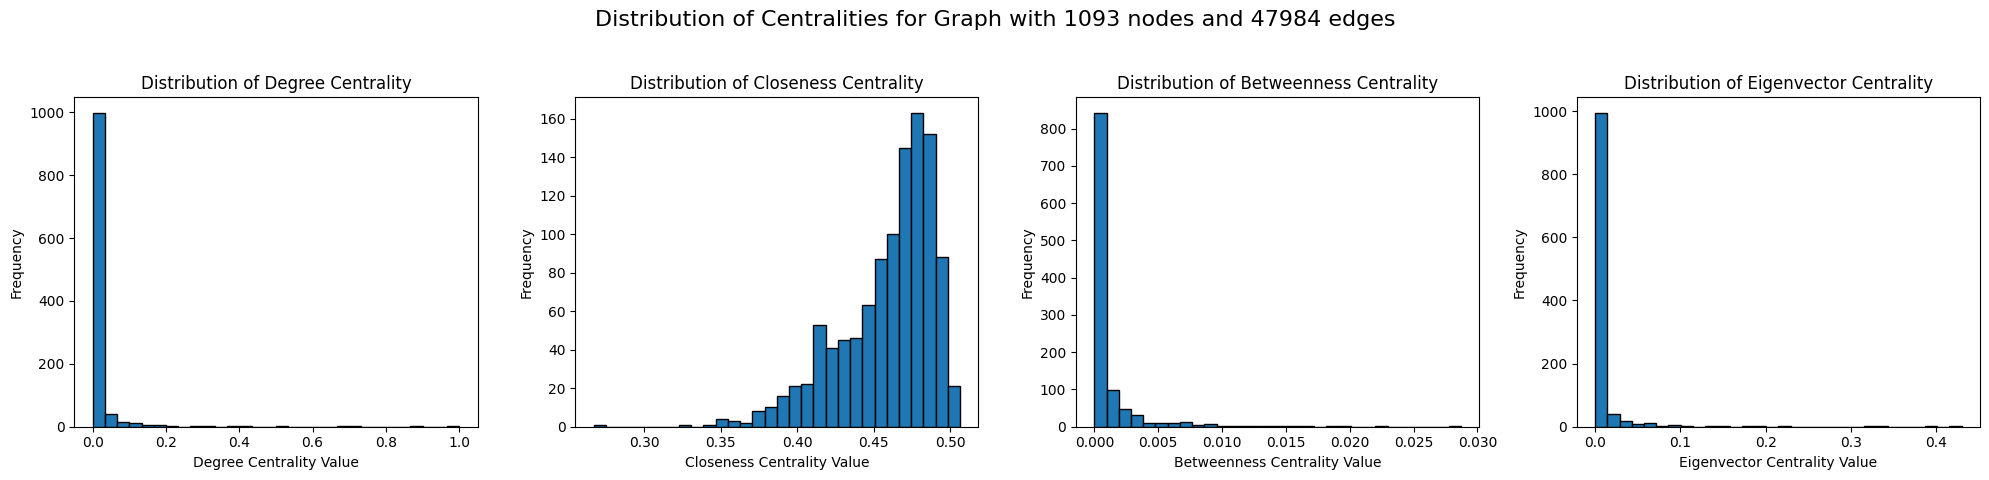

In [121]:
centralities = compute_centralities(ingredient_graph)
df = pd.DataFrame(centralities)
plot_centrality_distributions(df, ingredient_graph)

In [122]:
def create_centrality_dataframe(centralities):
    df = pd.DataFrame({
        'Ingredient': list(centralities['strength'].keys()),
        'Strength Centrality': list(centralities['strength'].values()),
        'Betweenness Centrality': list(centralities['betweenness'].values()),
        'Closeness Centrality': list(centralities['closeness'].values()),
        'Eigenvector Centrality': list(centralities['eigenvector'].values())
    })
    
    return df

Top Ingredients by Degree Centrality:
   Ingredient  Strength Centrality
10       salt             1.000000
7      pepper             0.875411
6       onion             0.715851
9      garlic             0.671238
31      sugar             0.531813
3      butter             0.401214
11  olive oil             0.382170
34      flour             0.379324
39      water             0.304101
76    chicken             0.280379


C:\Users\vassa\AppData\Local\Temp\ipykernel_24368\3006686322.py:22: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


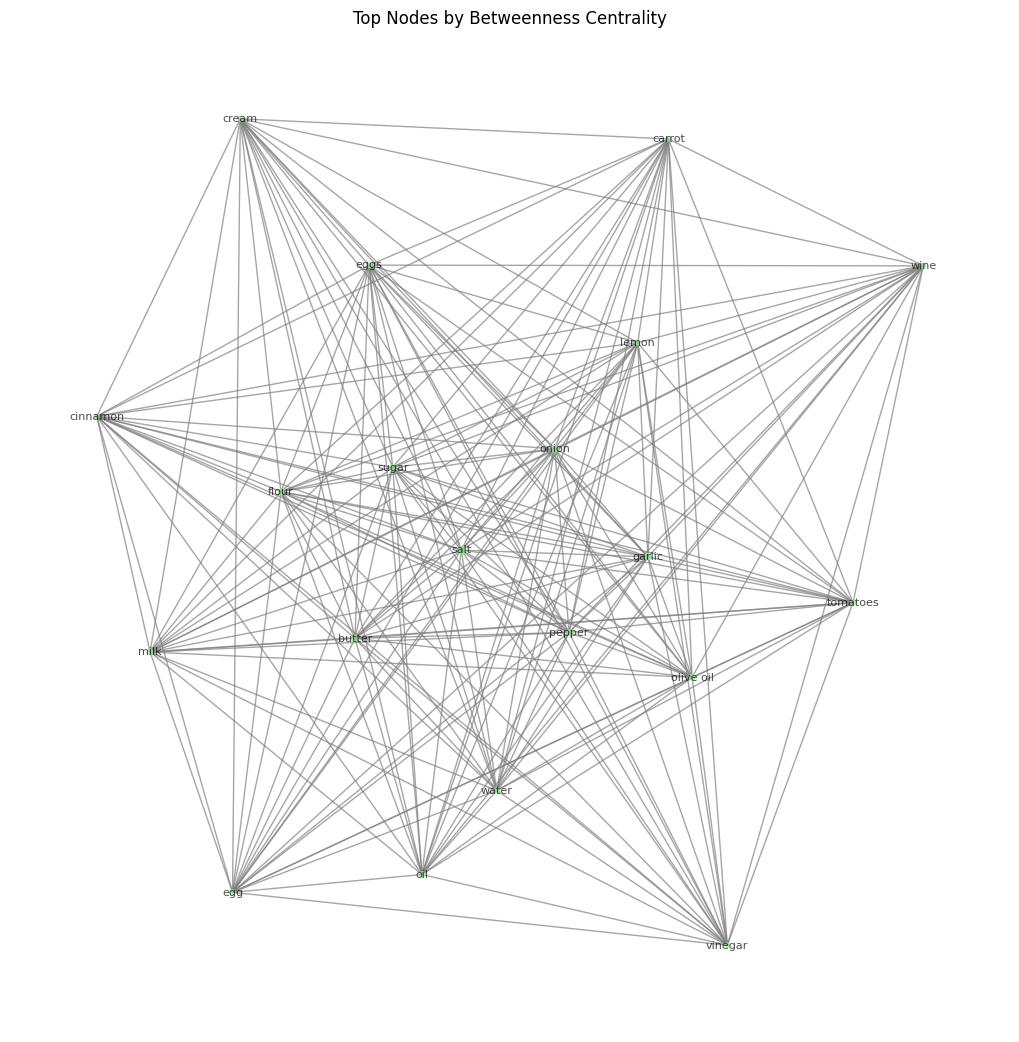

In [123]:
centrality_df = create_centrality_dataframe(centralities)
top_centrality = centrality_df.sort_values(by='Strength Centrality', ascending=False).head(10)

print("Top Ingredients by Degree Centrality:")
print(top_centrality[['Ingredient', 'Strength Centrality']])

top_n = 20
top_betweenness = sorted(centralities['betweenness'].items(), key=lambda x: x[1], reverse=True)[:top_n]
top_nodes = [node for node, _ in top_betweenness]
top_graph = ingredient_graph.subgraph(top_nodes)

plt.figure(figsize=(10, 10))
pos = nx.spring_layout(top_graph, k=0.5, iterations=50)

node_size = [(centralities['betweenness'])[node] * 1000 for node in top_graph.nodes()]
nx.draw(
    top_graph, pos, with_labels=True, node_color='lightgreen', node_size=node_size,
    font_size=8, edge_color='gray', alpha=0.7
)

plt.title("Top Nodes by Betweenness Centrality")
plt.tight_layout()
plt.show()


## Community detection

In [124]:
pip install python-louvain

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.0.1 -> 24.3.1
[notice] To update, run: C:\Users\vassa\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [125]:
from community import community_louvain

In [126]:
def analyze_communities(G):
    communities = community_louvain.best_partition(G, weight='weight')
    
    modularity = community_louvain.modularity(communities, G, weight='weight')
    
    community_sizes = pd.Series(communities.values()).value_counts()
    
    community_stats = {
        'num_communities': len(community_sizes),
        'largest_community_size': community_sizes.max(),
        'smallest_community_size': community_sizes.min(),
        'average_community_size': community_sizes.mean(),
        'modularity': modularity
    }
    
    node_community_df = pd.DataFrame({
        'Node': list(communities.keys()),
        'Community': list(communities.values())
    })
    
    return communities, modularity, community_stats, node_community_df

In [127]:
def analyze_community_ingredients(G, communities, centrality_df=None):
    community_analysis = {}

    comm_to_ingredients = {}
    for ingredient, comm in communities.items():
        if comm not in comm_to_ingredients:
            comm_to_ingredients[comm] = []
        comm_to_ingredients[comm].append(ingredient)
    
    for comm_id, ingredients in comm_to_ingredients.items():
        subgraph = G.subgraph(ingredients)
        
        internal_density = nx.density(subgraph)
        
        central_ingredients = []
        if centrality_df is not None:
            comm_df = centrality_df[centrality_df['Ingredient'].isin(ingredients)]
            central_ingredients = comm_df.nlargest(20, 'Strength Centrality')['Ingredient'].tolist()
        
        community_analysis[comm_id] = {
            'size': len(ingredients),
            'internal_density': internal_density,
            'top_ingredients': central_ingredients,
            'all_ingredients': ingredients
        }
    
    return community_analysis

In [128]:
def print_community_summary(stats, community_analysis):
    print(f"Community Detection Summary:")
    print(f"Number of communities: {stats['num_communities']}")
    print(f"Modularity score: {stats['modularity']:.4f}")
    print(f"Community sizes: {stats['smallest_community_size']} to {stats['largest_community_size']}")
    print(f"Average community size: {stats['average_community_size']:.2f}")
    print("\nTop ingredients in largest communities:")
    
    sorted_communities = sorted(community_analysis.items(), 
                              key=lambda x: x[1]['size'], 
                              reverse=True)

    for comm_id, data in sorted_communities[:20]:
        print(f"\nCommunity {comm_id} (Size: {data['size']}):")
        if data['top_ingredients']:
            print(f"Top ingredients: {', '.join(data['top_ingredients'])}")
        print(f"Internal density: {data['internal_density']:.4f}")

In [129]:
communities, modularity, stats, node_comm_df = analyze_communities(ingredient_graph)
community_analysis = analyze_community_ingredients(ingredient_graph, communities, centrality_df)

In [130]:
print_community_summary(stats, community_analysis)

Community Detection Summary:
Number of communities: 5
Modularity score: 0.1593
Community sizes: 4 to 498
Average community size: 218.60

Top ingredients in largest communities:

Community 0 (Size: 498):
Top ingredients: salt, pepper, onion, garlic, olive oil, chicken, tomatoes, parsley, cumin, chili, vinegar, tomato, cilantro, carrot, cheese, bean, celery, paprika, potato, mustard
Internal density: 0.1267

Community 1 (Size: 389):
Top ingredients: sugar, butter, flour, water, eggs, milk, egg, cinnamon, cream, baking, baking soda, honey, extract, vanilla, nutmeg, cream cheese, chocolate, coconut, almond, buttermilk
Internal density: 0.1075

Community 4 (Size: 162):
Top ingredients: oil, ginger, lime, rice, soy, coriander, cornstarch, turmeric, scallion, fish, curry, sesame oil, peanut, broccoli, seed, garam masala, salmon, peanut oil, saffron, mango
Internal density: 0.1333

Community 2 (Size: 40):
Top ingredients: lemon, yogurt, mint, foil, couscous, tilapia, pomegranate, tahini, sumac

## Clustering Coefficients

In [131]:
def calculate_weighted_clustering(ingredient_graph, ingredient_types=None):
    clustering_coeffs = nx.clustering(ingredient_graph, weight='weight')

    print("Weighted Clustering Coefficients (Individual Ingredients):")
    for ingredient, coeff in clustering_coeffs.items():
        print(f"{ingredient}: {coeff:.4f}")
    
    if ingredient_types:
        type_clustering = defaultdict(list)
        for ingredient, coeff in clustering_coeffs.items():
            ingredient_type = ingredient_types.get(ingredient, "Unknown")
            type_clustering[ingredient_type].append(coeff)

        clustering_by_type = {
            ingredient_type: sum(coeffs) / len(coeffs) if coeffs else 0
            for ingredient_type, coeffs in type_clustering.items()
        }

        print("\nAverage Weighted Clustering Coefficients by Ingredient Type:")
        for ingredient_type, avg_coeff in clustering_by_type.items():
            print(f"{ingredient_type}: {avg_coeff:.4f}")
        
        return clustering_by_type
    
    return clustering_coeffs


Weighted Clustering Coefficients (Individual Ingredients):
meatloaf: 0.0012
bacon: 0.0010
cheese: 0.0011
butter: 0.0010
eggs: 0.0010
spinach: 0.0011
onion: 0.0012
pepper: 0.0014
potatoes: 0.0014
garlic: 0.0012
salt: 0.0011
olive oil: 0.0011
beef: 0.0010
taco: 0.0015
shell: 0.0014
lettuce: 0.0009
tomatoes: 0.0010
salsa: 0.0014
cheddar: 0.0012
corn: 0.0011
pork: 0.0010
bean: 0.0012
tomato: 0.0012
beef broth: 0.0011
chip: 0.0014
bouillon: 0.0012
sazón: 0.0013
cinnamon: 0.0010
chili: 0.0012
cumin: 0.0013
coriander: 0.0012
sugar: 0.0010
chocolate: 0.0008
milk: 0.0009
flour: 0.0010
cream: 0.0008
apple: 0.0007
lemon: 0.0010
macaroni: 0.0017
water: 0.0009
cornstarch: 0.0009
paprika: 0.0012
vinegar: 0.0009
ketchup: 0.0010
applesauce: 0.0012
ponzu: 0.0012
syrup: 0.0007
smoke: 0.0011
cider: 0.0008
oregano: 0.0012
cayenne: 0.0010
egg: 0.0009
olive: 0.0011
pepperoni: 0.0013
mushroom: 0.0011
mozzarella: 0.0013
pizza: 0.0013
celery: 0.0010
molasses: 0.0010
worcestershire: 0.0010
buns: 0.0011
seltzer:

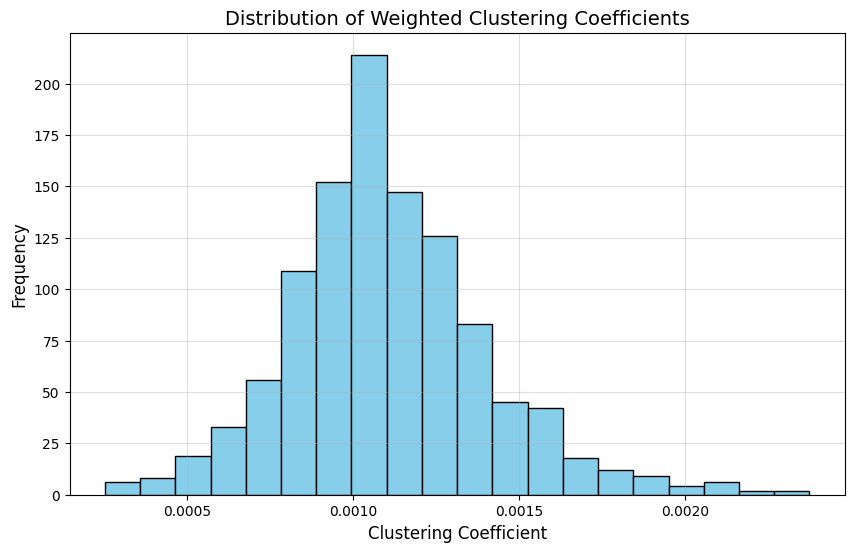

In [132]:
def plot_clustering_histogram(clustering_coeffs):
    plt.figure(figsize=(10, 6))
    plt.hist(clustering_coeffs.values(), bins=20, color='skyblue', edgecolor='black')
    plt.title("Distribution of Weighted Clustering Coefficients", fontsize=14)
    plt.xlabel("Clustering Coefficient", fontsize=12)
    plt.ylabel("Frequency", fontsize=12)
    plt.grid(alpha=0.4)
    plt.show()

clustering_coeffs = calculate_weighted_clustering(ingredient_graph)

plot_clustering_histogram(clustering_coeffs)


In [133]:
def display_top_clustering_ingredients(clustering_coeffs, top_n=10):
    sorted_clustering = sorted(clustering_coeffs.items(), key=lambda x: x[1], reverse=True)
    print(f"\nTop {top_n} Ingredients by Weighted Clustering Coefficient:")
    for ingredient, coeff in sorted_clustering[:top_n]:
        print(f"  {ingredient}: {coeff:.4f}")
    
    print(f"\nBottom {top_n} Ingredients by Weighted Clustering Coefficient:")
    for ingredient, coeff in sorted_clustering[-top_n:]:
        print(f"  {ingredient}: {coeff:.4f}")

display_top_clustering_ingredients(clustering_coeffs)



Top 10 Ingredients by Weighted Clustering Coefficient:
  culantro: 0.0024
  annatto: 0.0023
  callaloo: 0.0023
  filet mignon: 0.0022
  legs: 0.0021
  malted milk: 0.0021
  morsels: 0.0021
  perch: 0.0021
  scoops: 0.0021
  buttery spread: 0.0021

Bottom 10 Ingredients by Weighted Clustering Coefficient:
  carob: 0.0004
  pimms: 0.0004
  7-up: 0.0004
  coffee creamer: 0.0004
  yuzu: 0.0003
  gel: 0.0003
  mints: 0.0003
  m&m's: 0.0003
  benedictine: 0.0003
  herbsaint: 0.0003


## Minimum Spanning Tree

In [134]:
def analyze_minimum_spanning_tree(G):

    mst = nx.minimum_spanning_tree(G, weight='weight')
    
    mst_degrees = dict(mst.degree())
    key_connection_points = sorted(mst_degrees.items(), key=lambda x: x[1], reverse=True)[:10] 
    
    mst_analysis = {
        'num_edges': mst.size(),
        'num_nodes': mst.order(),
        'average_degree': sum(mst_degrees.values()) / len(mst_degrees),
        'key_connection_points': key_connection_points
    }
    
    pos = nx.spring_layout(mst)
    plt.figure(figsize=(12, 8))
    nx.draw(
        mst, pos, with_labels=True, 
        node_size=500, node_color='lightblue', 
        edge_color='gray', font_size=8
    )
    plt.title("Minimum Spanning Tree of Ingredient Network")
    plt.show()
    
    return mst, mst_analysis


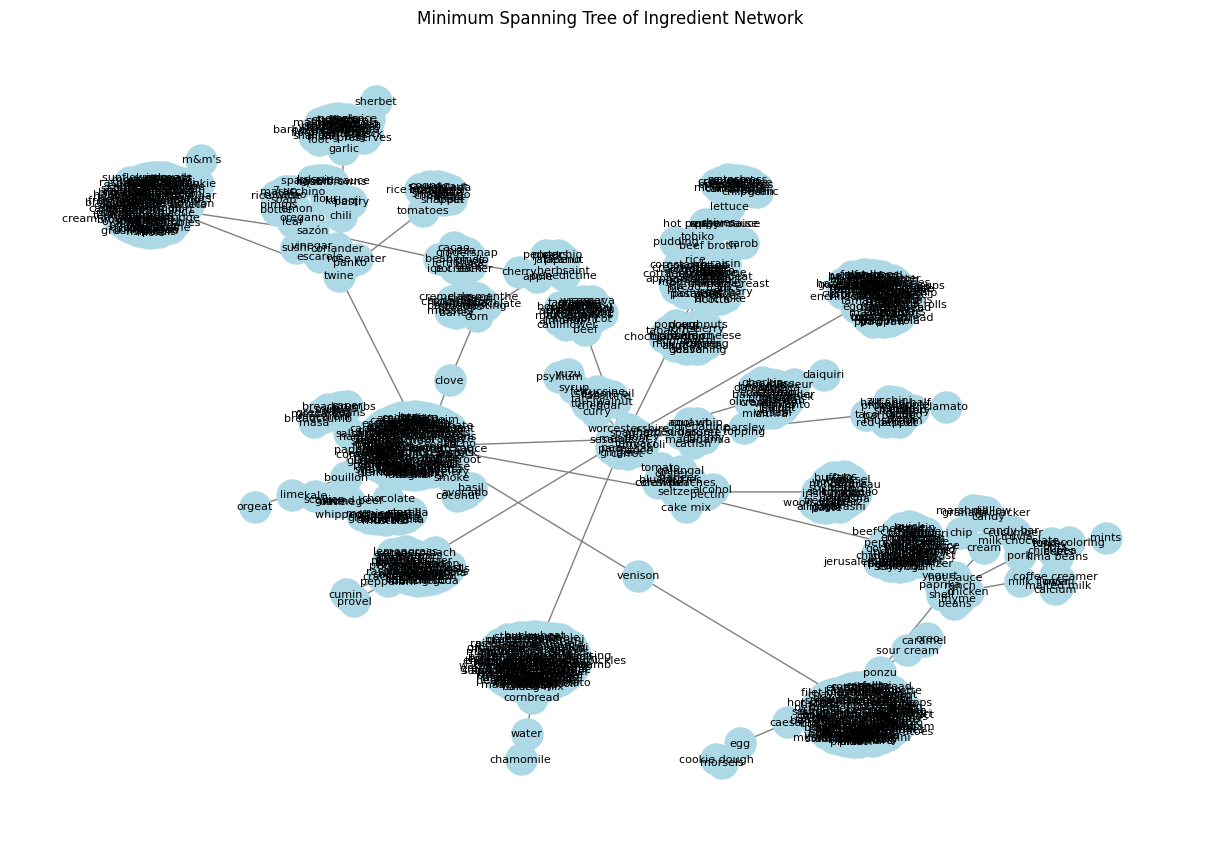

Minimum Spanning Tree Analysis:
Number of nodes in MST: 1093
Number of edges in MST: 1092
Average degree in MST: 2.00
Key connection points (top 10 by degree):
  Ingredient: bacon, Degree: 141
  Ingredient: butter, Degree: 140
  Ingredient: cheese, Degree: 114
  Ingredient: onion, Degree: 108
  Ingredient: eggs, Degree: 80
  Ingredient: pepper, Degree: 50
  Ingredient: spinach, Degree: 47
  Ingredient: potatoes, Degree: 45
  Ingredient: garlic, Degree: 36
  Ingredient: salt, Degree: 27


In [135]:
mst, mst_analysis = analyze_minimum_spanning_tree(ingredient_graph)

print("Minimum Spanning Tree Analysis:")
print(f"Number of nodes in MST: {mst_analysis['num_nodes']}")
print(f"Number of edges in MST: {mst_analysis['num_edges']}")
print(f"Average degree in MST: {mst_analysis['average_degree']:.2f}")
print("Key connection points (top 10 by degree):")
for node, degree in mst_analysis['key_connection_points']:
    print(f"  Ingredient: {node}, Degree: {degree}")

## Assortativity

Assortativity measures whether nodes in a graph with similar properties (like degree) tend to connect to each other. We can calculate degree assortativity to analyze if high-degree ingredients are more likely to connect with other high-degree ingredients.

In [136]:
def calculate_assortativity(ingredient_graph):
    degree_assortativity = nx.degree_assortativity_coefficient(ingredient_graph, weight='weight')
    print(f"Degree Assortativity Coefficient: {degree_assortativity:.4f}")
    
calculate_assortativity(ingredient_graph)

Degree Assortativity Coefficient: -1.4805


We create a scatter plot of the degree of one node versus the degree of its neighbor for all edges.

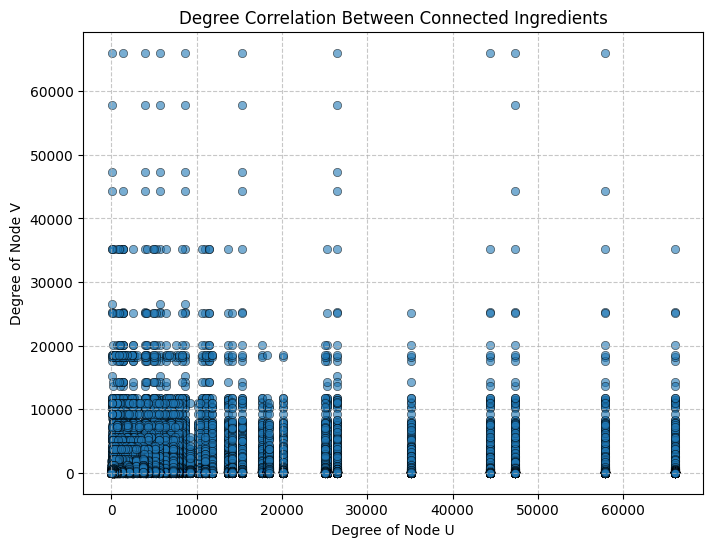

In [137]:
def plot_degree_correlations(ingredient_graph):
    edge_degrees = [
        (ingredient_graph.degree(u, weight='weight'), ingredient_graph.degree(v, weight='weight'))
        for u, v in ingredient_graph.edges()
    ]
    degrees_u, degrees_v = zip(*edge_degrees)
    
    plt.figure(figsize=(8, 6))
    plt.scatter(degrees_u, degrees_v, alpha=0.6, edgecolors='k', linewidth=0.5)
    plt.xlabel("Degree of Node U")
    plt.ylabel("Degree of Node V")
    plt.title("Degree Correlation Between Connected Ingredients")
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.show()

plot_degree_correlations(ingredient_graph)
